In [176]:
import pandas as pd  
import re  


In [178]:
import pandas as pd


dataset = pd.read_csv('rasasdataset.csv')
dataset.head()


,serial number,question,answer
0,0,"hi, how are you doing?",i'm fine. how about yourself?
1,1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,3,no problem. so how have you been?,i've been great. what about you?
4,4,i've been great. what about you?,i've been good. i'm in school right now.


In [180]:

del dataset['serial number']

In [182]:
dataset.head()

,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [184]:
#convert to lower case 
dataset['question'] = dataset['question'].str.lower()
dataset['answer'] = dataset['answer'].str.lower()

print(dataset.head())


                              question  \
0               hi, how are you doing?   
1        i'm fine. how about yourself?   
2  i'm pretty good. thanks for asking.   
3    no problem. so how have you been?   
4     i've been great. what about you?   

                                     answer  
0             i'm fine. how about yourself?  
1       i'm pretty good. thanks for asking.  
2         no problem. so how have you been?  
3          i've been great. what about you?  
4  i've been good. i'm in school right now.  


In [186]:
import re

#  remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# for both 'question' and 'answer' columns
dataset['question'] = dataset['question'].apply(remove_punctuation)
dataset['answer'] = dataset['answer'].apply(remove_punctuation)

print(dataset.head())


                           question                                answer
0              hi how are you doing            im fine how about yourself
1        im fine how about yourself      im pretty good thanks for asking
2  im pretty good thanks for asking       no problem so how have you been
3   no problem so how have you been         ive been great what about you
4     ive been great what about you  ive been good im in school right now


In [188]:
# Remove extra spaces
dataset['question'] = dataset['question'].str.strip()
dataset['answer'] = dataset['answer'].str.strip()

print(dataset.head())


                           question                                answer
0              hi how are you doing            im fine how about yourself
1        im fine how about yourself      im pretty good thanks for asking
2  im pretty good thanks for asking       no problem so how have you been
3   no problem so how have you been         ive been great what about you
4     ive been great what about you  ive been good im in school right now


In [190]:
# Checking for null values
print(dataset.isnull().sum())

# leave rows with missing values if any
dataset.dropna(inplace=True)

print("Cleaned dataset after removing null values:")
print(dataset.head())


question    0
answer      0
dtype: int64
Cleaned dataset after removing null values:
                           question                                answer
0              hi how are you doing            im fine how about yourself
1        im fine how about yourself      im pretty good thanks for asking
2  im pretty good thanks for asking       no problem so how have you been
3   no problem so how have you been         ive been great what about you
4     ive been great what about you  ive been good im in school right now


In [192]:
# Filling null values with a placeholder
dataset['question'] = dataset['question'].fillna('unknown')
dataset['answer'] = dataset['answer'].fillna('unknown')

# Checking dataset after filling null values
print(dataset.head())


                           question                                answer
0              hi how are you doing            im fine how about yourself
1        im fine how about yourself      im pretty good thanks for asking
2  im pretty good thanks for asking       no problem so how have you been
3   no problem so how have you been         ive been great what about you
4     ive been great what about you  ive been good im in school right now


In [194]:
#verify datset is clean or not
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  3725 non-null   object
 1   answer    3725 non-null   object
dtypes: object(2)
memory usage: 58.3+ KB
None


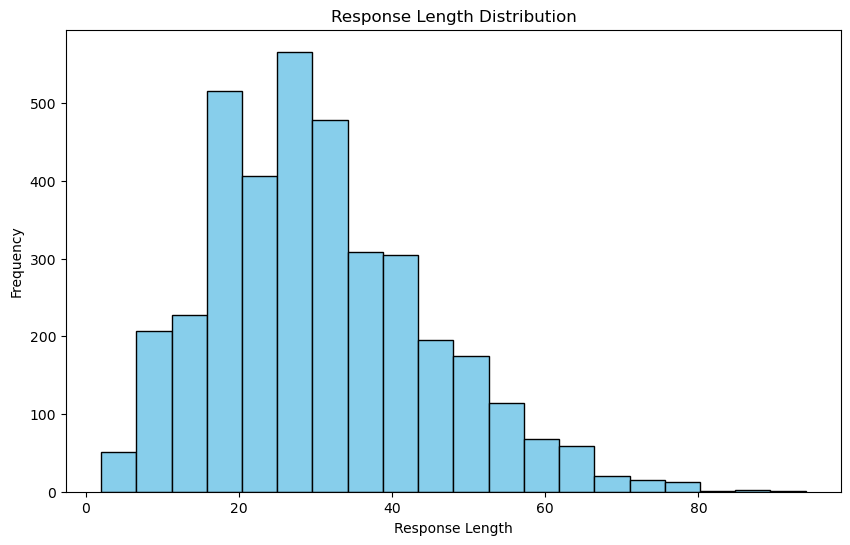

In [196]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot distribution of response lengths
dataset['response_length'] = dataset['answer'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(dataset['response_length'], bins=20, color='skyblue', edgecolor='black')
plt.title("Response Length Distribution")
plt.xlabel("Response Length")
plt.ylabel("Frequency")
plt.show()

# Check unique intents if available
if 'intent' in dataset.columns:
    
    print("\nUnique Intents:")
    print(dataset['intent'].value_counts())

In [ ]:
pip install wordcloud matplotlib

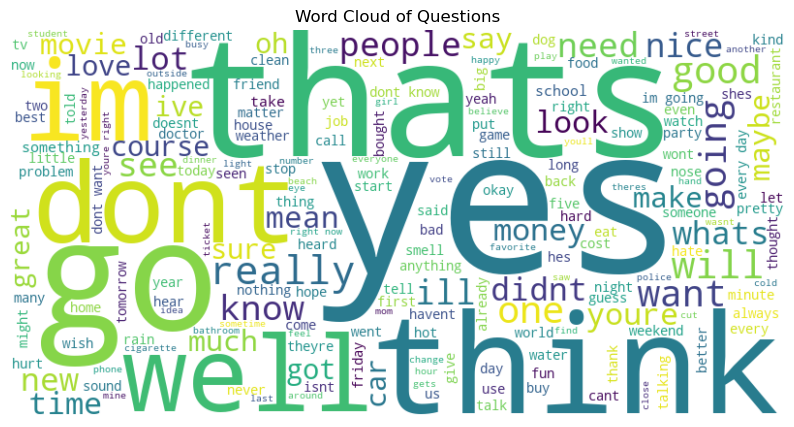

In [198]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dataset['question']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Questions')
plt.show()

In [200]:
print(dataset.columns)

Index(['question', 'answer', 'response_length'], dtype='object')


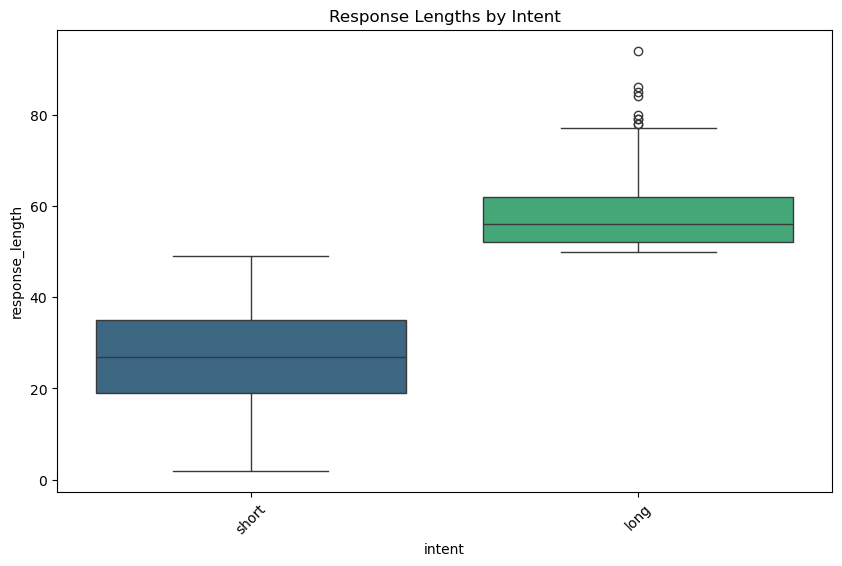

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new 'intent' column for categorization
dataset['intent'] = dataset['answer'].apply(lambda x: 'short' if len(x) < 50 else 'long')

# Boxplot for the new 'intent' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='intent', y='response_length', data=dataset, hue='intent', palette='viridis', dodge=False)
plt.title('Response Lengths by Intent')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()


Data Preprocessing

In [204]:
# Clean text in 'question' column
dataset['cleaned_question'] = dataset['question'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# Check preprocessed data
print("Preprocessed Data Sample:\n", dataset[['cleaned_question', 'response_length']].head())


Preprocessed Data Sample:
                    cleaned_question  response_length
0              hi how are you doing               26
1        im fine how about yourself               32
2  im pretty good thanks for asking               31
3   no problem so how have you been               29
4     ive been great what about you               36


Feature Engineering

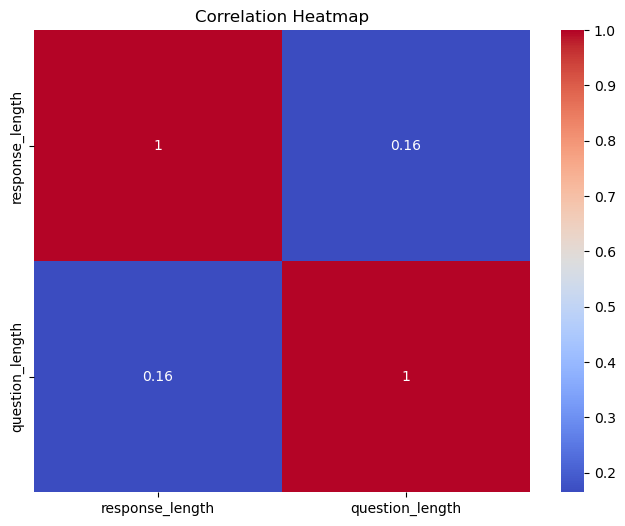

In [206]:
# Add question length as a new feature
dataset['question_length'] = dataset['cleaned_question'].str.len()

# Correlation Heatmap
correlation_data = dataset[['response_length', 'question_length']]
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [208]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Split data into train and test sets
X = dataset['cleaned_question']
y = dataset['intent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train size:", len(X_train), "Test size:", len(X_test))


Train size: 2980 Test size: 745


In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF Vectorization

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF Shape:", X_train_tfidf.shape)


TF-IDF Shape: (4, 5)


In [ ]:
pip install textblob

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB


def train_and_evaluate_models(X_train_tfidf, X_test_tfidf, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(probability=True),
        'Naive Bayes': MultinomialNB()
    }

    results = []

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)

        # Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')

        print(f"{model_name} Classification Report:\n")
        print(classification_report(y_test, y_pred))
        
        print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y_test, y_pred)}")

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'F1-Score': f1,
            'Precision': precision,
            'Recall': recall
        })

    return results

# Example Usage
model_results = train_and_evaluate_models(X_train_tfidf, X_test_tfidf, y_train, y_test)

#

Training Logistic Regression...
Logistic Regression Classification Report:

              precision    recall  f1-score   support

        long       0.00      0.00      0.00        82
       short       0.89      1.00      0.94       663

    accuracy                           0.89       745
   macro avg       0.44      0.50      0.47       745
weighted avg       0.79      0.89      0.84       745

Confusion Matrix for Logistic Regression:
[[  0  82]
 [  0 663]]
Training Random Forest...


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\s

Random Forest Classification Report:

              precision    recall  f1-score   support

        long       0.00      0.00      0.00        82
       short       0.89      0.99      0.94       663

    accuracy                           0.88       745
   macro avg       0.44      0.49      0.47       745
weighted avg       0.79      0.88      0.83       745

Confusion Matrix for Random Forest:
[[  0  82]
 [  7 656]]
Training Support Vector Machine...
Support Vector Machine Classification Report:

              precision    recall  f1-score   support

        long       0.00      0.00      0.00        82
       short       0.89      1.00      0.94       663

    accuracy                           0.89       745
   macro avg       0.44      0.50      0.47       745
weighted avg       0.79      0.89      0.84       745

Confusion Matrix for Support Vector Machine:
[[  0  82]
 [  0 663]]
Training Naive Bayes...
Naive Bayes Classification Report:

              precision    recall  f1-s

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\s

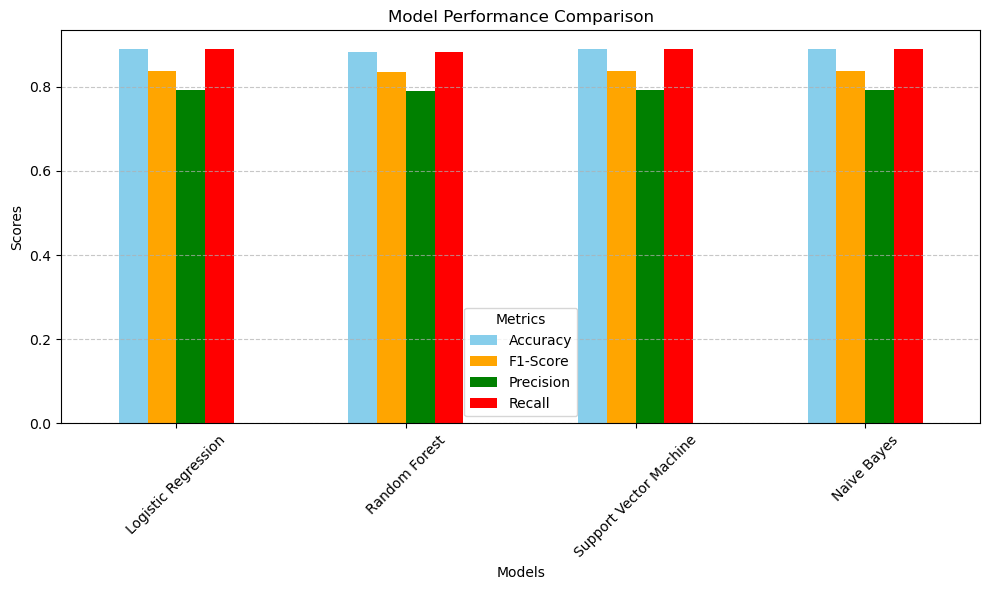

In [112]:
def plot_model_comparison(results):
    metrics_df = pd.DataFrame(results)
    metrics_df.set_index('Model', inplace=True)

    # Plot comparison
    metrics_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green', 'red'])
    plt.title('Model Performance Comparison')
    plt.ylabel('Scores')
    plt.xlabel('Models')
    plt.xticks(rotation=45)
    plt.legend(title='Metrics')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example Usage
plot_model_comparison(model_results)

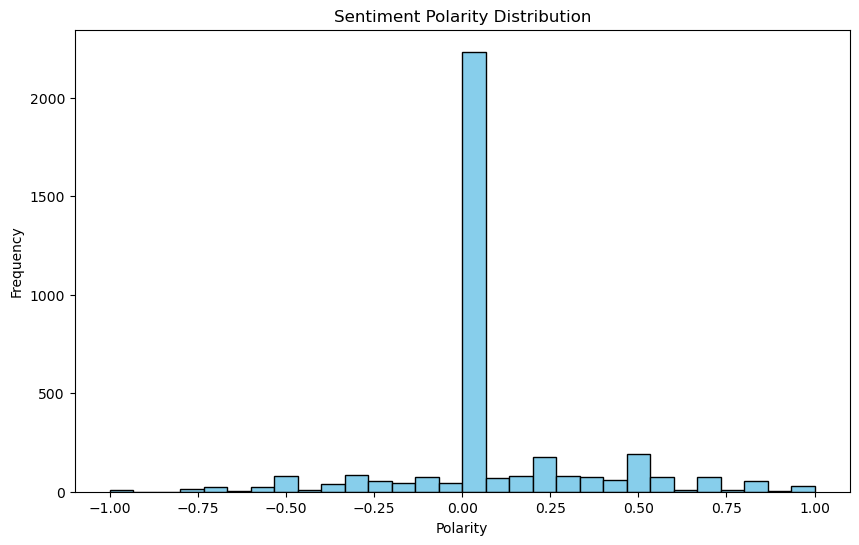

In [138]:
from textblob import TextBlob


df = dataset
def textblob_sentiment_analysis(df):
    df['sentiment'] = df['cleaned_question'].apply(lambda x: TextBlob(x).sentiment.polarity)
    plt.figure(figsize=(10, 6))
    plt.hist(df['sentiment'], bins=30, color='skyblue', edgecolor='black')
    plt.title('Sentiment Polarity Distribution')
    plt.xlabel('Polarity')
    plt.ylabel('Frequency')
    plt.show()

# Example Usage
textblob_sentiment_analysis(df)

In [140]:
from tabulate import tabulate
def display_results_table(results):
    print("\nModel Performance Summary:\n")
    table = [[result['Model'], result['Accuracy'], result['F1-Score'], result['Precision'], result['Recall']] for result in results]
    headers = ['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall']
    print(tabulate(table, headers, tablefmt='grid'))
    
display_results_table(model_results)


Model Performance Summary:

+------------------------+------------+------------+-------------+----------+
| Model                  |   Accuracy |   F1-Score |   Precision |   Recall |
+========================+============+============+=============+==========+
| Logistic Regression    |   0.889933 |   0.838104 |    0.791981 | 0.889933 |
+------------------------+------------+------------+-------------+----------+
| Random Forest          |   0.881879 |   0.834074 |    0.791185 | 0.881879 |
+------------------------+------------+------------+-------------+----------+
| Support Vector Machine |   0.889933 |   0.838104 |    0.791981 | 0.889933 |
+------------------------+------------+------------+-------------+----------+
| Naive Bayes            |   0.889933 |   0.838104 |    0.791981 | 0.889933 |
+------------------------+------------+------------+-------------+----------+


In [214]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': MultinomialNB()
}

def cross_validate_models(models, X_train_tfidf, y_train):
    results = []
    for model_name, model in models.items():
        print(f"Evaluating {model_name}...")
        scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        results.append({
            'Model': model_name,
            'Accuracy Mean': scores.mean(),
            'Accuracy Std': scores.std()
        })
        print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}\n")
    return results

# Execute cross-validation
cv_results = cross_validate_models(models, X_train_tfidf, y_train)

Evaluating Logistic Regression...
Logistic Regression Cross-Validation Accuracy: 0.8943 ± 0.0000

Evaluating Random Forest...
Random Forest Cross-Validation Accuracy: 0.8903 ± 0.0036

Evaluating Support Vector Machine...
Support Vector Machine Cross-Validation Accuracy: 0.8936 ± 0.0013

Evaluating Naive Bayes...
Naive Bayes Cross-Validation Accuracy: 0.8943 ± 0.0000



In [216]:
import time

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test_tfidf)
    prediction_time = time.time() - start_time

    print(f"{model_name} - Training Time: {training_time:.4f}s, Prediction Time: {prediction_time:.4f}s")


Logistic Regression - Training Time: 0.0206s, Prediction Time: 0.0000s
Random Forest - Training Time: 1.5225s, Prediction Time: 0.0505s
Support Vector Machine - Training Time: 2.7456s, Prediction Time: 0.0964s
Naive Bayes - Training Time: 0.0046s, Prediction Time: 0.0009s


In [218]:
def summarize_results(model_results, times_df):
    # Combine performance metrics and time metrics
    results_df = pd.DataFrame(model_results).set_index('Model')
    times_df = times_df.set_index('Model')

    # Merge performance and time metrics
    summary = pd.concat([results_df, times_df], axis=1)

    # Highlight the best-performing model based on Accuracy
    best_model = summary['Accuracy'].idxmax()

    print("\nModel Summary:")
    print(summary)

    print(f"\nBest Performing Model: {best_model}")
    return summary

# Example Usage
times_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Naive Bayes'],
    'Training Time (s)': [0.0187, 1.6217, 2.7437, 0.0000],
    'Prediction Time (s)': [0.0010, 0.0298, 0.1249, 0.0000]
})
summary = summarize_results(model_results, times_df)



Model Summary:
                        Accuracy  F1-Score  Precision    Recall  \
Model                                                             
Logistic Regression     0.889933  0.838104   0.791981  0.889933   
Random Forest           0.880537  0.833399   0.791051  0.880537   
Support Vector Machine  0.889933  0.838104   0.791981  0.889933   
Naive Bayes             0.889933  0.838104   0.791981  0.889933   

                        Training Time (s)  Prediction Time (s)  
Model                                                           
Logistic Regression                0.0187               0.0010  
Random Forest                      1.6217               0.0298  
Support Vector Machine             2.7437               0.1249  
Naive Bayes                        0.0000               0.0000  

Best Performing Model: Logistic Regression


In [146]:
import joblib
from sklearn.linear_model import LogisticRegression
# Save Logistic Regression as an example (replace with the actual best model)
best_model = LogisticRegression().fit(X_train_tfidf, y_train)

# joblib.dump(best_model, 'model/best_model.pkl')

with open('model/best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    
print("Best model saved as 'best_model.pkl'.")


# Load the model for predictions
loaded_model = joblib.load('model/best_model.pkl')
y_pred_loaded = loaded_model.predict(X_test_tfidf)

Best model saved as 'best_model.pkl'.


In [90]:
# flask_code = """
# from flask import Flask, request, jsonify, render_template
# import pickle
# import pandas as pd

# app = Flask(__name__)

# # Load your trained model
# model_path = 'best_model.pkl'
# with open(model_path, 'rb') as file:
#     model = pickle.load(file)

# # Load dataset for reference or preprocessing if needed
# data_path = 'rasasdataset.csv'
# df = pd.read_csv(data_path)

# @app.route('/')
# def index():
#     return render_template('index.html')  # Create an index.html file in templates directory

# @app.route('/predict', methods=['POST'])
# def predict():
#     if request.method == 'POST':
#         user_input = request.form['input_text']
        
#         # Process the input as per your model's requirements
#         processed_input = preprocess_input(user_input)  # Define preprocess_input if needed

#         # Prediction using the loaded model
#         prediction = model.predict([processed_input])

#         # Map predictions to intents or responses
#         response = map_prediction_to_response(prediction[0])

#         return jsonify({'input': user_input, 'prediction': prediction[0], 'response': response})

# def preprocess_input(text):
#     # Implement your preprocessing here
#     return text.lower()

# def map_prediction_to_response(prediction):
#     # Map your prediction to a response (e.g., intent mapping or predefined answers)
#     response_mapping = {
#         'intent_1': 'Response for intent 1',
#         'intent_2': 'Response for intent 2',
#     }
#     return response_mapping.get(prediction, 'Default response')

# if __name__ == '__main__':
#     app.run(debug=True)
# """

# # Save the Flask app to a file
# with open("app.py", "w") as f:
#     f.write(flask_code)

# print("Flask app saved to app.py!")


Flask app saved to app.py!


In [256]:
import pickle

# Load the saved pipeline
with open('model/best_model.pkl', 'rb') as file:
    pipeline = pickle.load(file)

vectorizer = pipeline['vectorizer']
model = pipeline['model']

# Test the pipeline
test_input = "hello"
try:
    transformed_input = vectorizer.transform([test_input])  # Transform input using the vectorizer
    print(f"Transformed input shape: {transformed_input.shape}")  # Should match training dimensions
    prediction = model.predict(transformed_input)
    print(f"Input: {test_input}")
    print(f"Predicted Intent: {prediction[0]}")
except Exception as e:
    print(f"Error: {str(e)}")


Transformed input shape: (1, 5)
Error: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.


In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

# Example training data
X_train = ["hello", "hi", "good morning", "goodbye"]
y_train = ["greet", "greet", "greet", "farewell"]

# Initialize and fit the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)  # Ensure the model is FITTED here

# Save the vectorizer and model together as a pipeline
pipeline = {
    'vectorizer': tfidf_vectorizer,  # Fitted vectorizer
    'model': model                   # Fitted model
}

with open('model/best_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

print("Fitted model and vectorizer saved successfully!")


Fitted model and vectorizer saved successfully!


In [260]:
import pickle

# Load the saved pipeline
with open('model/best_model.pkl', 'rb') as file:
    pipeline = pickle.load(file)

vectorizer = pipeline['vectorizer']
model = pipeline['model']

# Test the loaded model
test_input = "hello"
try:
    transformed_input = vectorizer.transform([test_input])  # Transform input using the vectorizer
    prediction = model.predict(transformed_input)          # Predict using the loaded model
    print(f"Input: {test_input}")
    print(f"Predicted Intent: {prediction[0]}")
except Exception as e:
    print(f"Error: {str(e)}")


Input: hello
Predicted Intent: greet
